In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

commodities = ['Maize', 'Wheat', 'Oats', 'Soybeans']
DATA_PATH = '/kaggle/input/processed-data' # Remove the /kaggle/input prefix for reproducing the results
Y_COLUMN = 'Sep'

In [2]:
commodities_datasets = []
for commodity in commodities:
    dataset = pd.read_csv(f'{DATA_PATH}/full_{commodity}.csv')
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset = dataset[['Date', Y_COLUMN, "Prime"]]
    commodities_datasets.append(dataset)

In [3]:
train_datasets = []
test_datasets = []
for i in range(len(commodities_datasets)):
    split_index = int(len(commodities_datasets[i]) * 0.8)
    train_df = commodities_datasets[i].iloc[:split_index]
    test_df = commodities_datasets[i].iloc[split_index:]
    train_datasets.append(train_df)
    test_datasets.append(test_df)
    assert len(commodities_datasets[i]) == len(train_df) + len(test_df)


## Forecasting with the chosen model: $SARIMAX((7,7,0)(2,1,0)_{30}$

We attempt to include the exogenous variable of the Prime here, taking into consideration the best combination of SARIMA parameters for each type of commodity, as chosen in the sarima.ipynb file.

### Maize

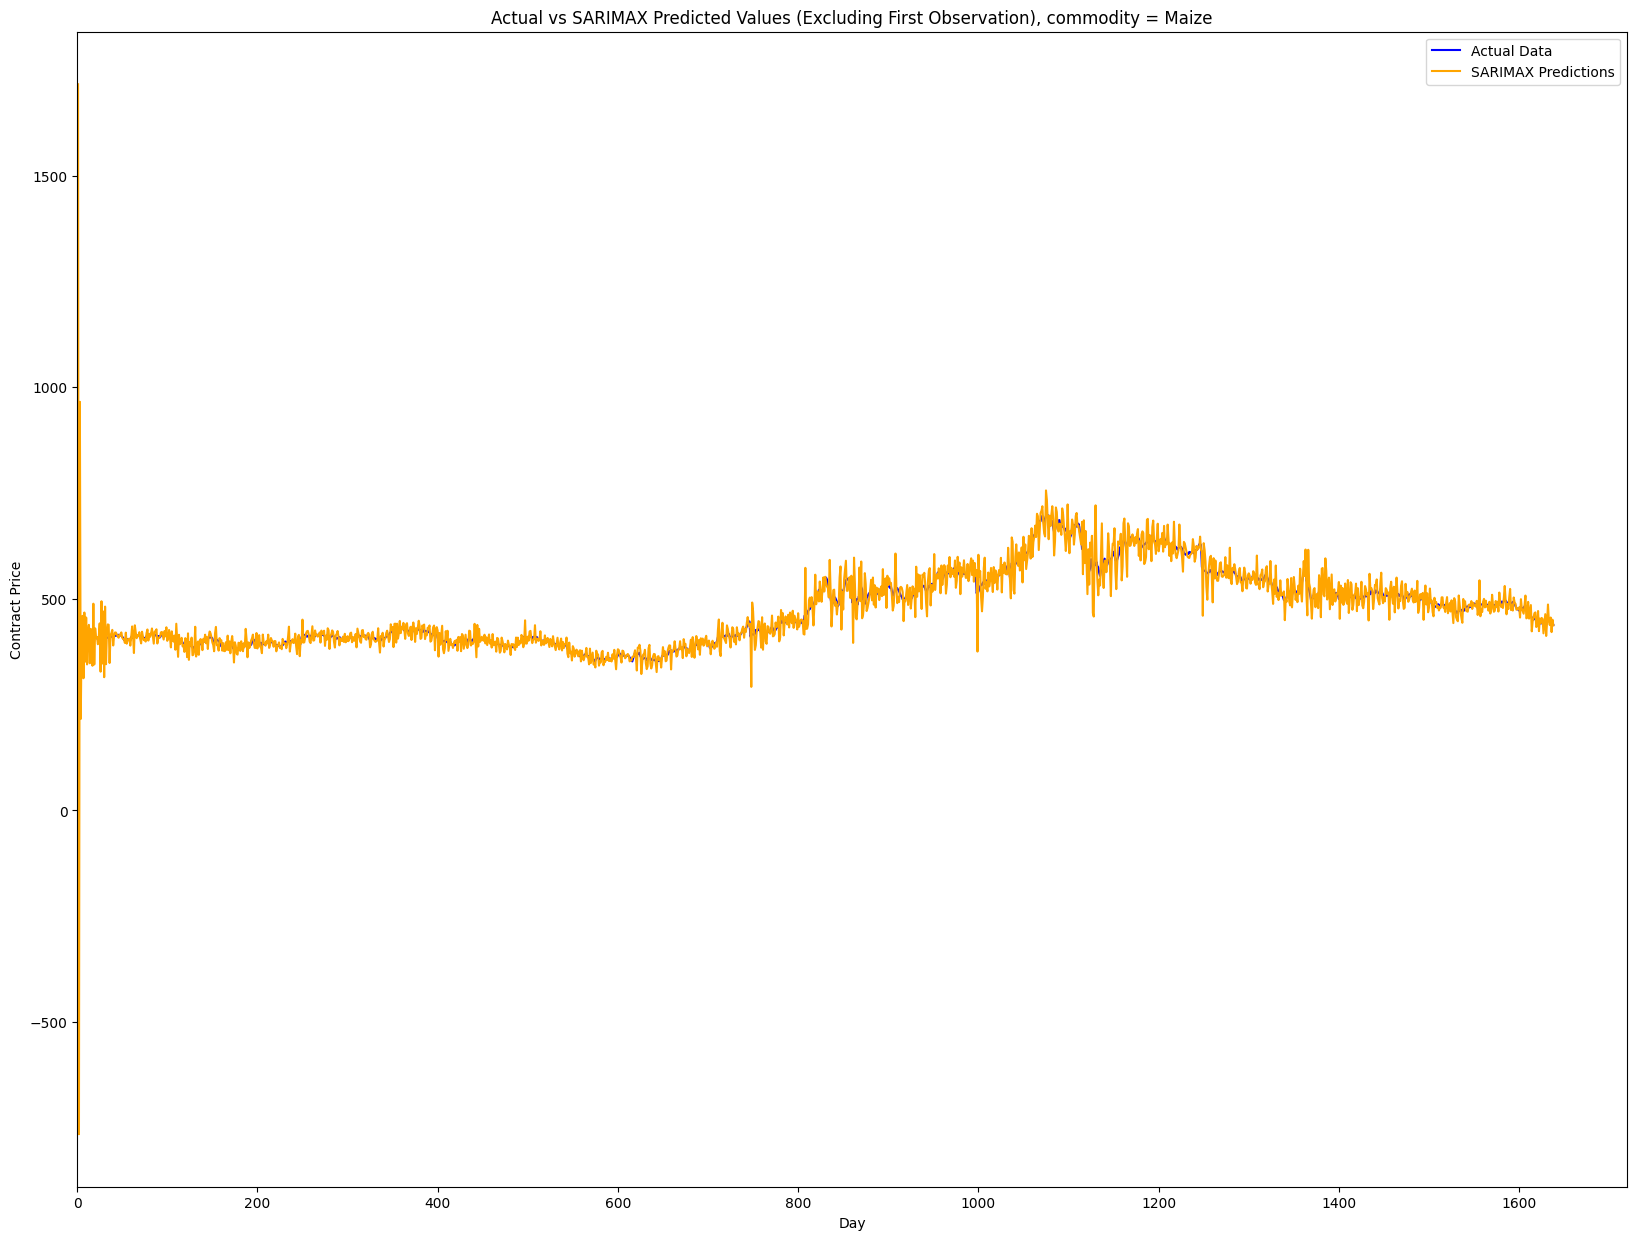

In [4]:
maize_all_sarimax = SARIMAX(commodities_datasets[0][Y_COLUMN],exog = commodities_datasets[0]["Prime"], order=(7, 7, 0),seasonal_order=(2, 1, 0, 30))
maize_all_sarimax_fit = maize_all_sarimax.fit(disp=False)

start = 1  # Start from the second observation
end = len(commodities_datasets[0][Y_COLUMN]) - 1  # End index for predictions

maize_all_sarimax_fit_predictions = maize_all_sarimax_fit.predict(start=start, end=end)

# Slice the actual data to exclude the first observation
actual_data_without_first_maize = commodities_datasets[0][Y_COLUMN][1:]

plt.figure(figsize=(20, 15))
plt.plot(actual_data_without_first_maize, label='Actual Data', color='blue')

plt.plot(maize_all_sarimax_fit_predictions, label='SARIMAX Predictions', color='orange')

plt.xlabel('Day')
plt.ylabel('Contract Price')
plt.title(f'Actual vs SARIMAX Predicted Values (Excluding First Observation), commodity = {commodities[0]}')
plt.legend()
plt.xlim(0,)
plt.show()


In [5]:
training_rmse_maize = (((maize_all_sarimax_fit_predictions[:-len(test_datasets[0])] - actual_data_without_first_maize[:-len(test_datasets[0])]) ** 2).mean())**0.5
training_rmse_maize

57.33513590769051

In [6]:
test_rmse_maize = (((maize_all_sarimax_fit_predictions[-len(test_datasets[0]):] - actual_data_without_first_maize[-len(test_datasets[0]):]) ** 2).mean())**0.5
test_rmse_maize

22.9285573635314

### Wheat

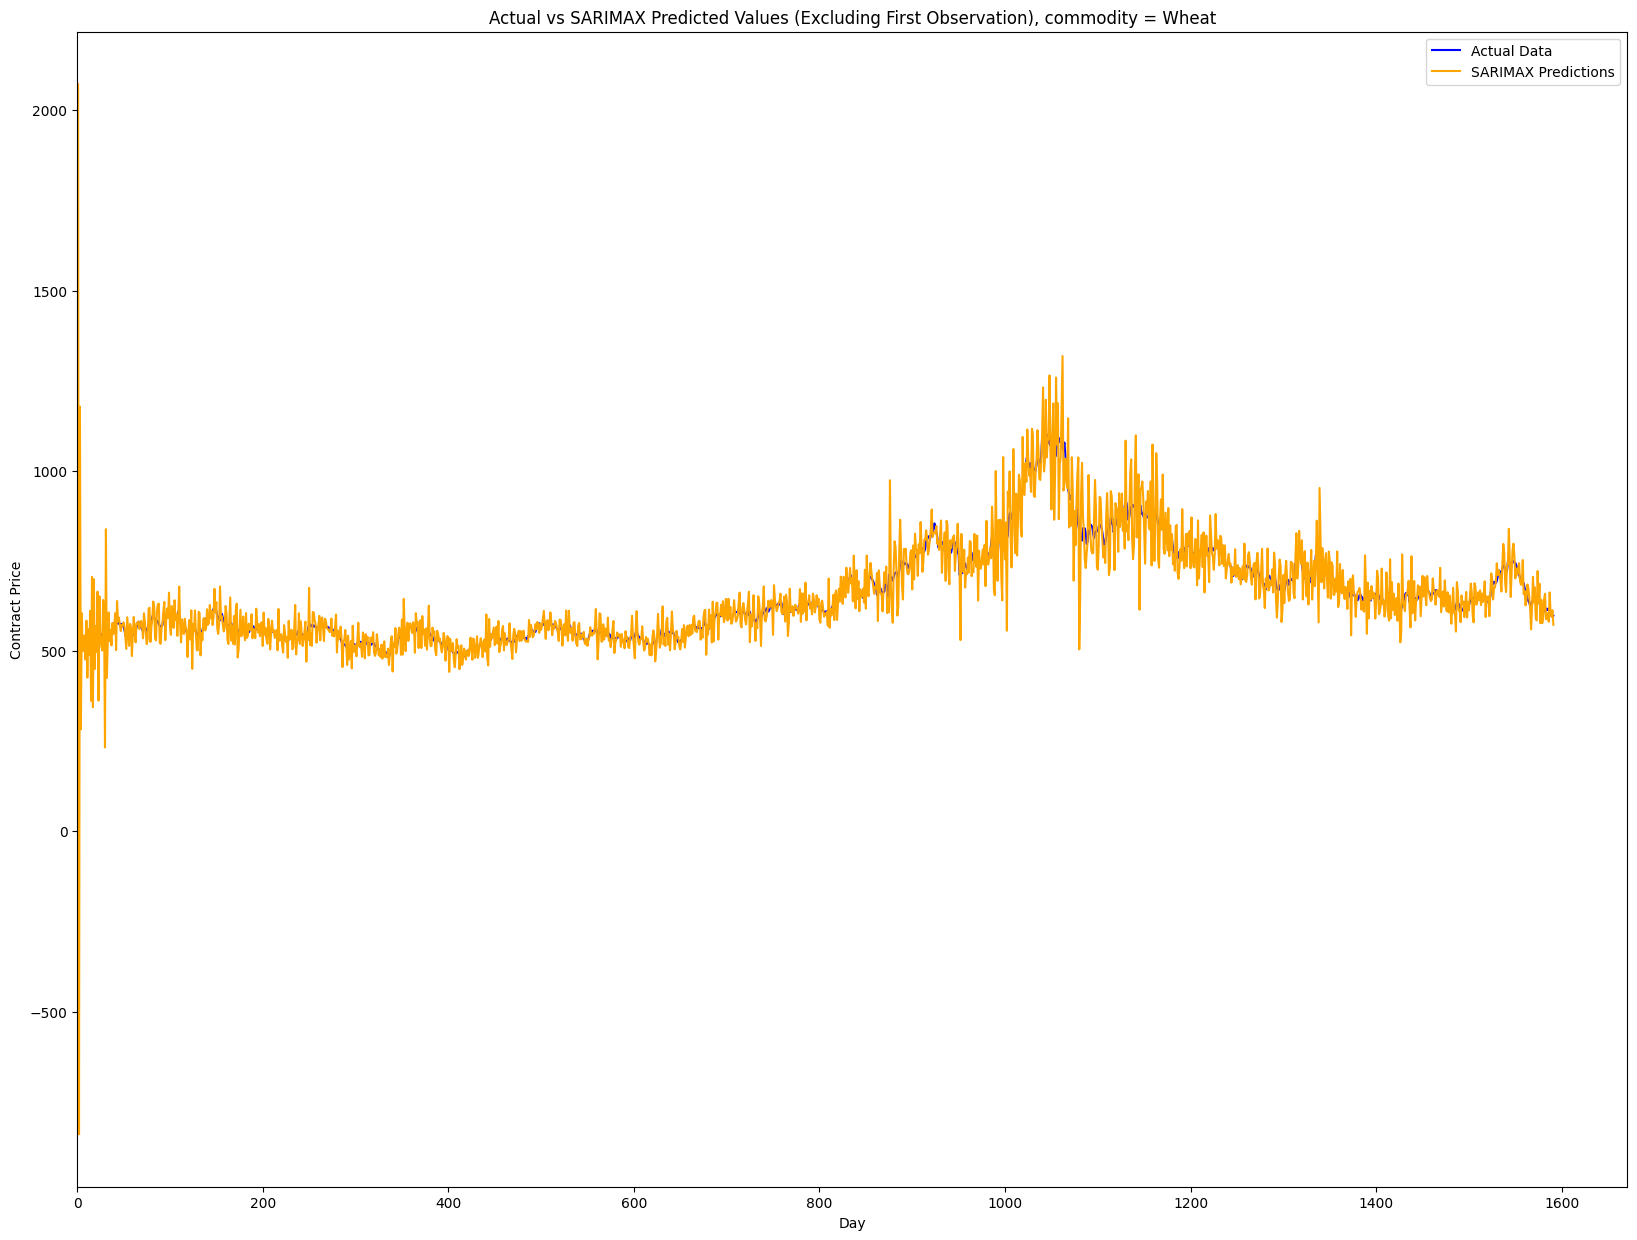

In [7]:
wheat_all_sarimax = SARIMAX(commodities_datasets[1][Y_COLUMN],exog = commodities_datasets[1]["Prime"], order=(7, 7, 0),seasonal_order=(2, 1, 0, 30))
wheat_all_sarimax_fit = wheat_all_sarimax.fit(disp=False)
start = 1  # Start from the second observation
end = len(commodities_datasets[1][Y_COLUMN]) - 1  # End index for predictions

wheat_all_sarimax_fit_predictions = wheat_all_sarimax_fit.predict(start=start, end=end)

# Slice the actual data to exclude the first observation
actual_data_without_first_wheat = commodities_datasets[1][Y_COLUMN][1:]

plt.figure(figsize=(20, 15))
plt.plot(actual_data_without_first_wheat, label='Actual Data', color='blue')

plt.plot(wheat_all_sarimax_fit_predictions, label='SARIMAX Predictions', color='orange')

plt.xlabel('Day')
plt.ylabel('Contract Price')
plt.title(f'Actual vs SARIMAX Predicted Values (Excluding First Observation), commodity = {commodities[1]}')
plt.legend()
plt.xlim(0,)

plt.show()


In [8]:
training_rmse_wheat = (((wheat_all_sarimax_fit_predictions[:-len(test_datasets[1])] - actual_data_without_first_wheat[:-len(test_datasets[1])]) ** 2).mean())**0.5
training_rmse_wheat

81.82334928473074

In [9]:
test_rmse_wheat = (((wheat_all_sarimax_fit_predictions[-len(test_datasets[1]):] - actual_data_without_first_wheat[-len(test_datasets[1]):]) ** 2).mean())**0.5
test_rmse_wheat

45.46534333102549

### Oats

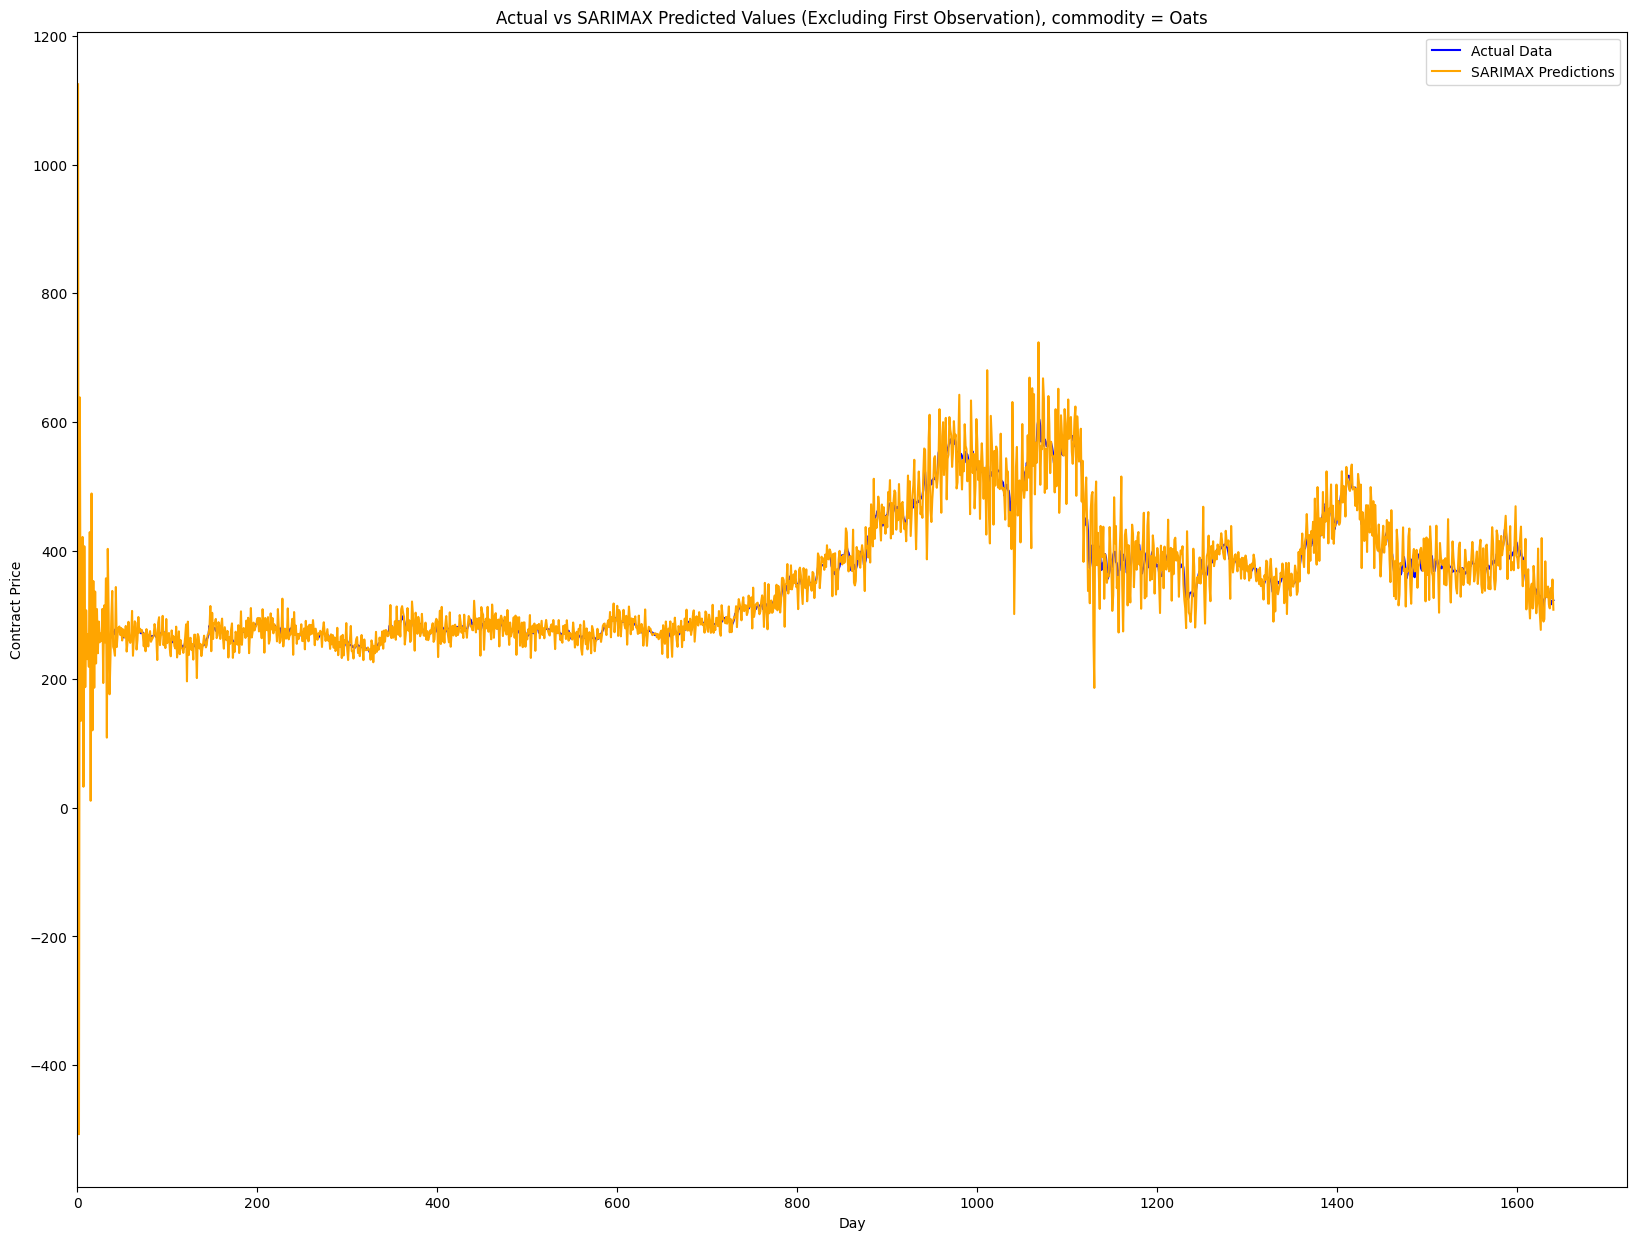

In [10]:
oats_all_sarimax = SARIMAX(commodities_datasets[2][Y_COLUMN],exog = commodities_datasets[2]["Prime"], order=(7, 7, 0),seasonal_order=(2, 1, 0, 30))
oats_all_sarimax_fit = oats_all_sarimax.fit(disp=False)
start = 1  # Start from the second observation
end = len(commodities_datasets[2][Y_COLUMN]) - 1  # End index for predictions

oats_all_sarimax_fit_predictions = oats_all_sarimax_fit.predict(start=start, end=end)

# Slice the actual data to exclude the first observation
actual_data_without_first_oats = commodities_datasets[2][Y_COLUMN][1:]

plt.figure(figsize=(20, 15))
plt.plot(actual_data_without_first_oats, label='Actual Data', color='blue')

plt.plot(oats_all_sarimax_fit_predictions, label='SARIMAX Predictions', color='orange')

plt.xlabel('Day')
plt.ylabel('Contract Price')
plt.title(f'Actual vs SARIMAX Predicted Values (Excluding First Observation), commodity = {commodities[2]}')
plt.legend()
plt.xlim(0,)

plt.show()


In [11]:
training_rmse_oats = (((oats_all_sarimax_fit_predictions[:-len(test_datasets[2])] - actual_data_without_first_oats[:-len(test_datasets[2])]) ** 2).mean())**0.5
training_rmse_oats

47.97479017686099

In [12]:
test_rmse_oats = (((oats_all_sarimax_fit_predictions[-len(test_datasets[2]):] - actual_data_without_first_oats[-len(test_datasets[2]):]) ** 2).mean())**0.5
test_rmse_oats

29.354337176133562

### Soybeans

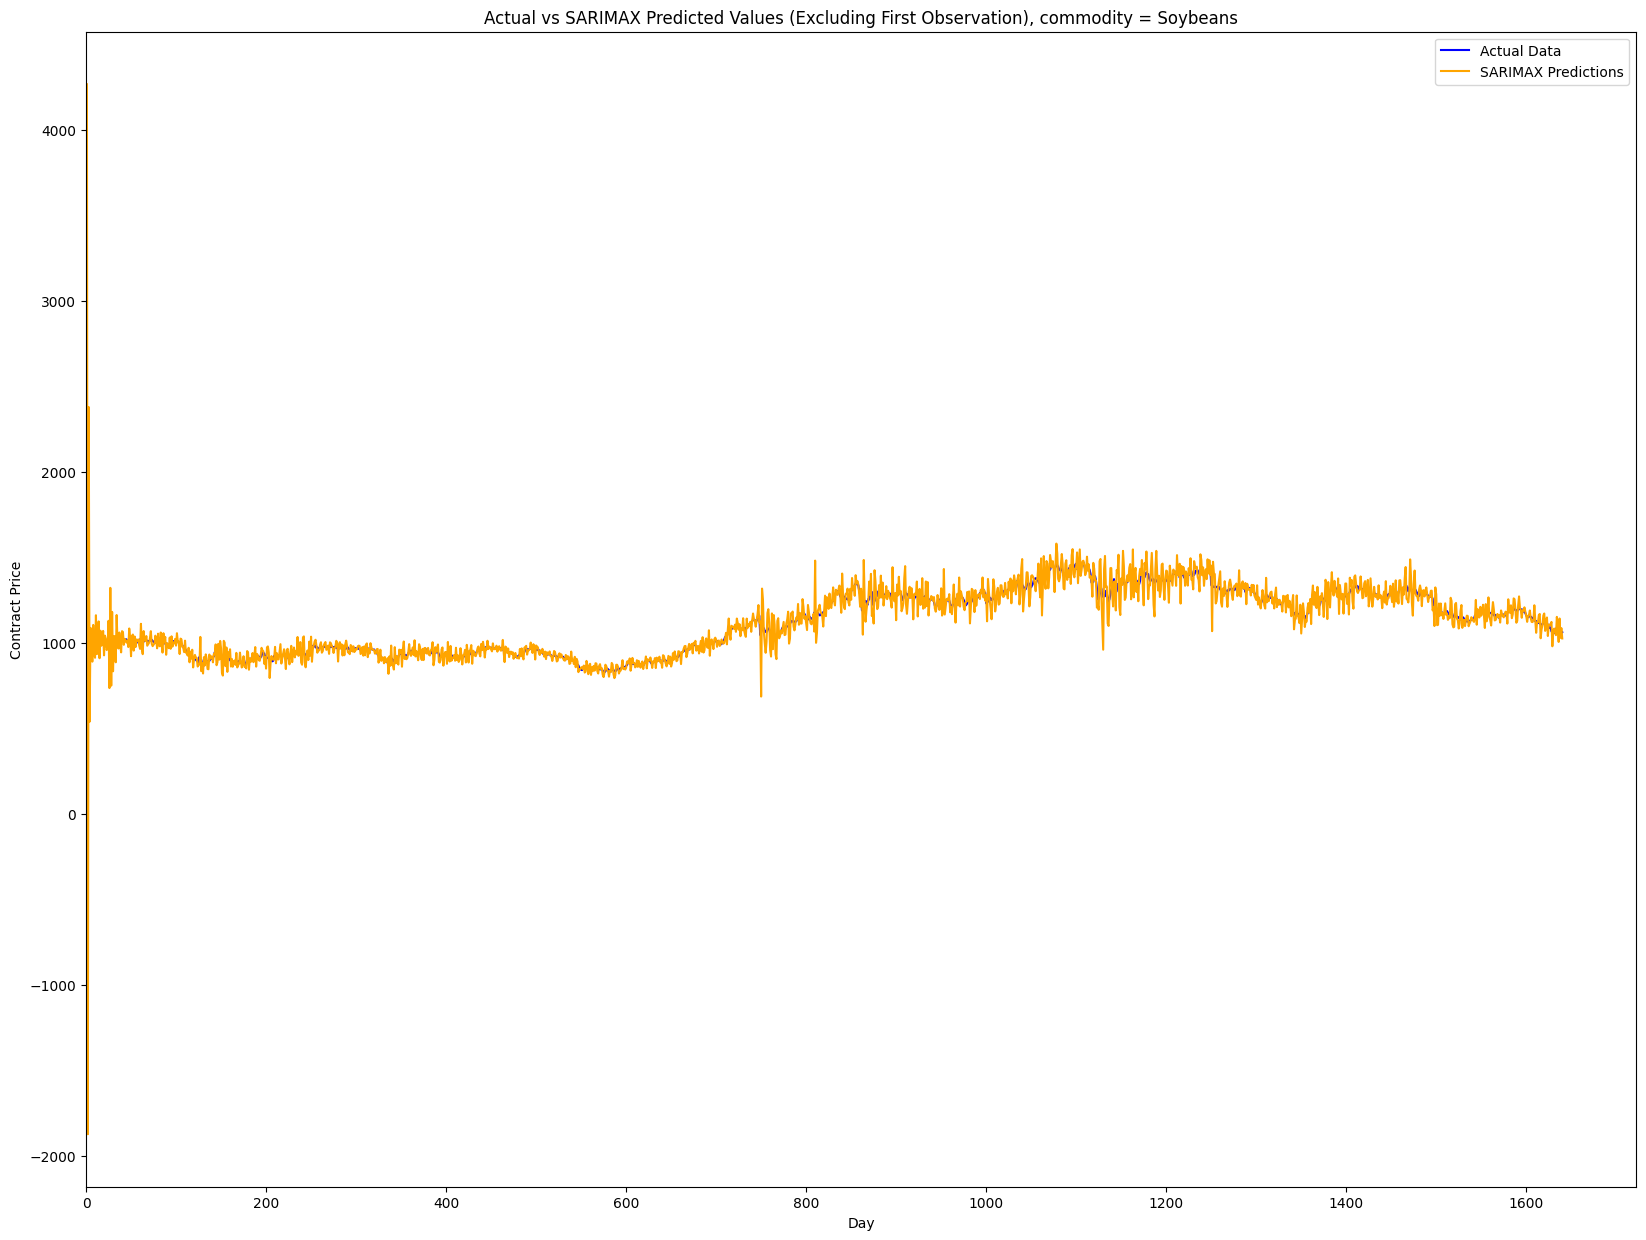

In [13]:
soybeans_all_sarimax = SARIMAX(commodities_datasets[3][Y_COLUMN],exog = commodities_datasets[3]["Prime"], order=(7, 7, 0),seasonal_order=(2, 1, 0, 30))
soybeans_all_sarimax_fit = soybeans_all_sarimax.fit(disp=False)
start = 1  # Start from the second observation
end = len(commodities_datasets[3][Y_COLUMN]) - 1  # End index for predictions

soybeans_all_sarimax_fit_predictions = soybeans_all_sarimax_fit.predict(start=start, end=end)

# Slice the actual data to exclude the first observation
actual_data_without_first_soybeans = commodities_datasets[3][Y_COLUMN][1:]

plt.figure(figsize=(20, 15))
plt.plot(actual_data_without_first_soybeans, label='Actual Data', color='blue')

plt.plot(soybeans_all_sarimax_fit_predictions, label='SARIMAX Predictions', color='orange')

plt.xlabel('Day')
plt.ylabel('Contract Price')
plt.title(f'Actual vs SARIMAX Predicted Values (Excluding First Observation), commodity = {commodities[3]}')
plt.legend()
plt.xlim(0,)

plt.show()


In [14]:
training_rmse_soybeans = (((soybeans_all_sarimax_fit_predictions[:-len(test_datasets[3])] - actual_data_without_first_soybeans[:-len(test_datasets[3])]) ** 2).mean())**0.5
training_rmse_soybeans

139.8449184524716

In [15]:
test_rmse_soybeans = (((soybeans_all_sarimax_fit_predictions[-len(test_datasets[3]):] - actual_data_without_first_soybeans[-len(test_datasets[3]):]) ** 2).mean())**0.5
test_rmse_soybeans

50.617490592121754

### Comparison of all RMSE losses, across all commodities (train and test)

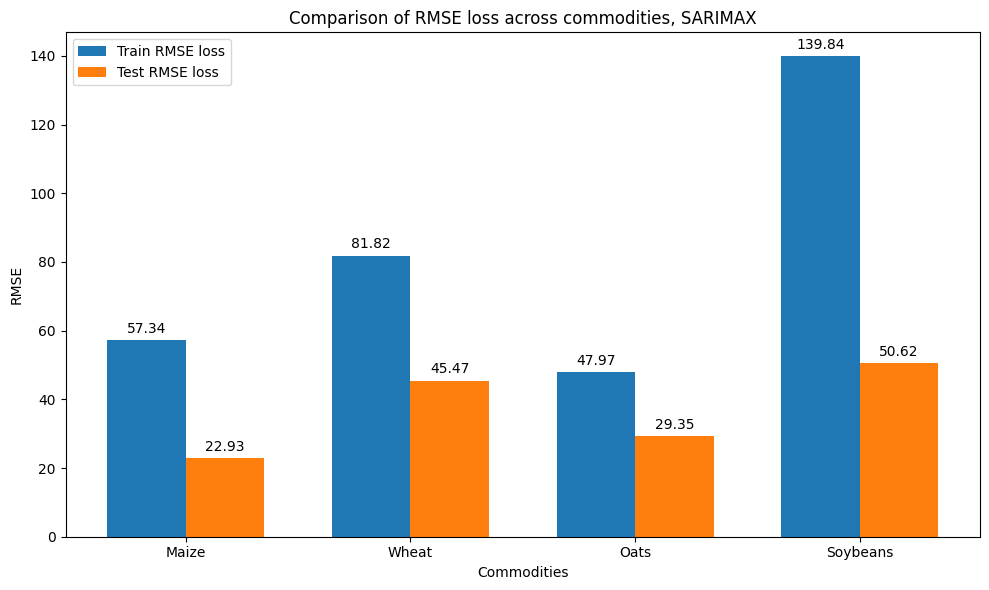

In [16]:
# RMSE values for each commodity: train and test losses
rmse_train = [training_rmse_maize, training_rmse_wheat, training_rmse_oats, training_rmse_soybeans]  # Example RMSE for train losses (4 commodities)
rmse_test = [test_rmse_maize, test_rmse_wheat, test_rmse_oats, test_rmse_soybeans]  # Example RMSE for test losses (4 commodities)

n_commodities = len(commodities)
ind = np.arange(n_commodities)  # the x locations for the commodities
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
train_bars = ax.bar(ind - width/2, rmse_train, width, label='Train RMSE loss')
test_bars = ax.bar(ind + width/2, rmse_test, width, label='Test RMSE loss')

ax.set_xlabel('Commodities')
ax.set_ylabel('RMSE')
ax.set_title('Comparison of RMSE loss across commodities, SARIMAX')
ax.set_xticks(ind)
ax.set_xticklabels(commodities)
ax.legend()

# Function to add labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(train_bars)
add_labels(test_bars)
plt.tight_layout()
plt.show()

------------

## Summarization

Compared to the SARIMA models, where we did not include the exogenous variable of the Prime, the difference in results is not significant and does not follow a consistent trend. In some commodities, the RMSE is higher, while in others it is lower, but in all cases the difference is not significant. There is slightly more impact when considering the training set, but again, the effect is not significant. This aligns with our initial hypothesis, which was a key reason for applying SARIMA in the first place—that exogenous features may not contribute meaningfully to the prediction of futures contract prices..